jax version 0.3.7
jax backend cpu


100%|██████████| 2000/2000 [00:01<00:00, 1849.10it/s, init loss: 67561.8828, avg. loss [1901-2000]: 113.4428]



                mean       std    median      2.5%     97.5%     n_eff     r_hat
         a      0.96      0.33      0.94      0.30      1.56   1049.96      1.00
        bl      2.63      2.45      2.69     -2.54      6.94    847.98      1.00
        br     -0.61      2.44     -0.65     -5.46      3.99    839.21      1.00
     sigma      0.63      0.04      0.63      0.55      0.72    970.09      1.00



/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


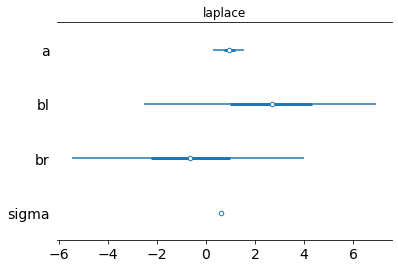

/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


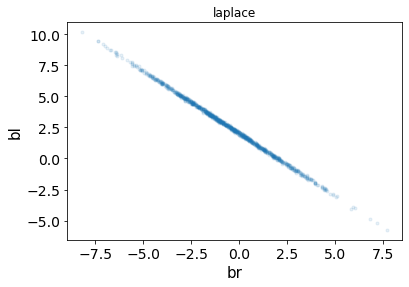

/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


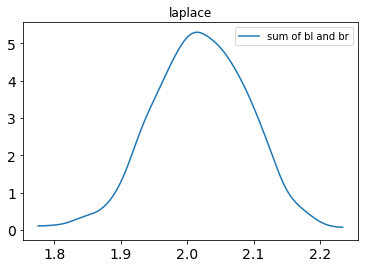

/tmp/ipykernel_21679/3393533003.py:178: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(kernel, num_warmup=500, num_samples=500, num_chains=4)
sample: 100%|██████████| 1000/1000 [00:01<00:00, 839.16it/s, 1023 steps of size 4.01e-03. acc. prob=0.91]
/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.97      0.34      0.97      0.42      1.54   1374.63      1.00
        bl      1.69      2.41      1.77     -2.18      5.53    579.65      1.00
        br      0.32      2.40      0.22     -3.52      4.19    580.43      1.00
     sigma      0.65      0.05      0.64      0.56      0.72   1047.10      1.00

Number of divergences: 0

                mean       std    median      2.5%     97.5%     n_eff     r_hat
         a      0.97      0.34      0.97      0.31      1.65   1369.27      1.00
        bl      1.69      2.41      1.77     -3.27      6.03    570.54      1.00
        br      0.32      2.40      0.22     -3.88      5.31    571.21      1.00
     sigma      0.65      0.05      0.64      0.54      0.73   1044.93      1.00



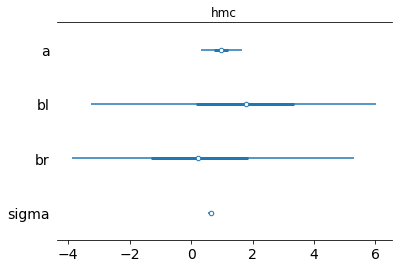

/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


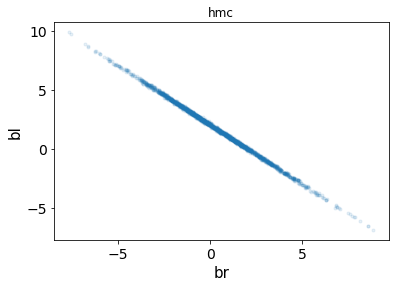

/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


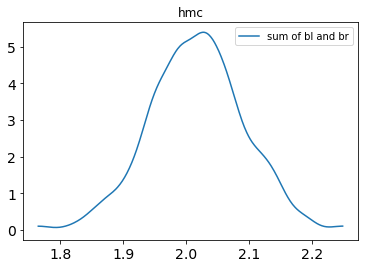

sample: 100%|██████████| 1000/1000 [00:00<00:00, 1175.79it/s, 127 steps of size 2.27e-02. acc. prob=0.50]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      1.02      0.36      1.02      0.47      1.58     89.77      1.03
        bl      1.35      0.45      1.41      0.58      1.97     35.11      1.05
        br      0.65      0.43      0.60      0.03      1.31     37.82      1.05
     sigma      0.65      0.05      0.65      0.57      0.72     86.17      1.03

Number of divergences: 115

                mean       std    median      2.5%     97.5%     n_eff     r_hat
         a      1.02      0.36      1.02      0.35      1.70     92.47      1.00
        bl      1.35      0.45      1.41      0.51      1.99     36.23      1.03
        br      0.65      0.43      0.60      0.02      1.38     39.92      1.03
     sigma      0.65      0.05      0.65      0.56      0.74     83.12      1.01



/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


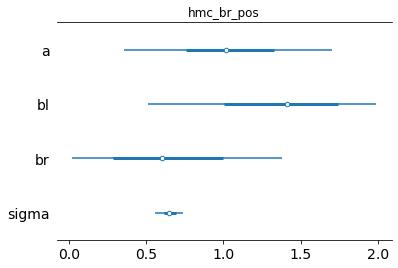

/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


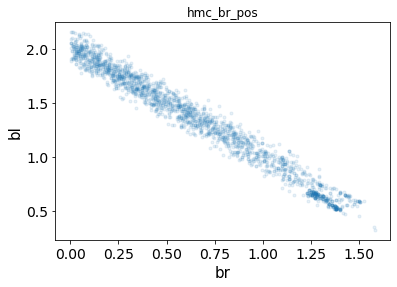

/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


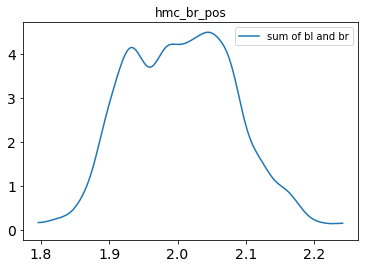

In [3]:
# We illustrate multicollinearity using the example in sec 6.1  of
# [Statistical Rethinking ed 2](https://xcelab.net/rm/statistical-rethinking/).
# The numpyro code is from [Du Phan's site]
# (https://fehiepsi.github.io/rethinking-numpyro/06-the-haunted-dag-and-the-causal-terror.html)

import numpy as np

np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
import math
import os
import warnings

try:
    import pandas as pd
except ModuleNotFoundError:
    %pip install -qq pandas
    import pandas as pd

import jax

print("jax version {}".format(jax.__version__))
print("jax backend {}".format(jax.lib.xla_bridge.get_backend().platform))

import jax.numpy as jnp
from jax import random, vmap

rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)

try:
    import numpyro
except ModuleNotFoundError:
    %pip install -qq numpyro
    import numpyro
import numpyro.distributions as dist
from numpyro.distributions import constraints
from numpyro.distributions.transforms import AffineTransform
from numpyro.diagnostics import hpdi, print_summary
from numpyro.infer import Predictive
from numpyro.infer import MCMC, NUTS
from numpyro.infer import SVI, Trace_ELBO, init_to_value
from numpyro.infer.autoguide import AutoLaplaceApproximation
import numpyro.optim as optim


try:
    import arviz as az
except ModuleNotFoundError:
    %pip install -qq arviz
    import arviz as az

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

# Data


def sample_data1():
    N = 100  # number of individuals
    with numpyro.handlers.seed(rng_seed=909):
        # sim total height of each
        height = numpyro.sample("height", dist.Normal(10, 2).expand([N]))
        # leg as proportion of height
        leg_prop = numpyro.sample("prop", dist.Uniform(0.4, 0.5).expand([N]))
        # sim right leg as proportion + error
        leg_right = leg_prop * height + numpyro.sample("right_error", dist.Normal(0, 0.02).expand([N]))
        # sim left leg as proportion + error
        leg_left = leg_prop * height + numpyro.sample("left_error", dist.Normal(0, 0.02).expand([N]))
        # combine into data frame
        d = pd.DataFrame({"height": height, "leg_left": leg_left, "leg_right": leg_right})

        return d


def sample_data2():
    N = 100  # number of individuals
    # sim total height of each
    height = dist.Normal(10, 2).sample(random.PRNGKey(0), (N,))
    # leg as proportion of height
    leg_prop = dist.Uniform(0.4, 0.5).sample(random.PRNGKey(1), (N,))
    # sim left leg as proportion + error
    leg_left = leg_prop * height + dist.Normal(0, 0.02).sample(random.PRNGKey(2), (N,))
    # sim right leg as proportion + error
    leg_right = leg_prop * height + dist.Normal(0, 0.02).sample(random.PRNGKey(3), (N,))
    # combine into data frame
    d = pd.DataFrame({"height": height, "leg_left": leg_left, "leg_right": leg_right})
    return d


df = sample_data2()

# Model


def model_book(leg_left, leg_right, height, br_positive=False):
    a = numpyro.sample("a", dist.Normal(10, 100))
    bl = numpyro.sample("bl", dist.Normal(2, 10))
    if br_positive:
        br = numpyro.sample("br", dist.TruncatedNormal(loc=0, low=2, high=10))
    else:
        br = numpyro.sample("br", dist.Normal(2, 10))
    sigma = numpyro.sample("sigma", dist.Exponential(1))
    mu = a + bl * leg_left + br * leg_right
    numpyro.sample("height", dist.Normal(mu, sigma), obs=height)


def model_vague_prior(leg_left, leg_right, height, br_positive=False):
    # we modify the priors to make them less informative
    a = numpyro.sample("a", dist.Normal(0, 100))
    bl = numpyro.sample("bl", dist.Normal(0, 100))
    if br_positive:
        br = numpyro.sample("br", dist.TruncatedNormal(loc=0, low=0, high=100))
    else:
        br = numpyro.sample("br", dist.Normal(0, 100))
    sigma = numpyro.sample("sigma", dist.Exponential(1))
    mu = a + bl * leg_left + br * leg_right
    numpyro.sample("height", dist.Normal(mu, sigma), obs=height)


model = model_vague_prior

# Analyse posterior


def analyze_post(post, method):
    print_summary(post, 0.95, False)
    fig, ax = plt.subplots()
    az.plot_forest(post, hdi_prob=0.95, figsize=(10, 4), ax=ax)
    plt.title(method)
    pml.savefig(f"multicollinear_forest_plot_{method}.pdf")
    plt.show()

    # post = m6_1.sample_posterior(random.PRNGKey(1), p6_1, (1000,))
    fig, ax = plt.subplots()
    az.plot_pair(post, var_names=["br", "bl"], scatter_kwargs={"alpha": 0.1}, ax=ax)
    pml.savefig(f"multicollinear_joint_post_{method}.pdf")
    plt.title(method)
    plt.show()

    sum_blbr = post["bl"] + post["br"]
    fig, ax = plt.subplots()
    az.plot_kde(sum_blbr, label="sum of bl and br", ax=ax)
    plt.title(method)
    pml.savefig(f"multicollinear_sum_post_{method}.pdf")
    plt.show()


# Laplace fit

m6_1 = AutoLaplaceApproximation(model)
svi = SVI(
    model,
    m6_1,
    optim.Adam(0.1),
    Trace_ELBO(),
    leg_left=df.leg_left.values,
    leg_right=df.leg_right.values,
    height=df.height.values,
    br_positive=False,
)
svi_run = svi.run(random.PRNGKey(0), 2000)
p6_1 = svi_run.params
losses = svi_run.losses
post_laplace = m6_1.sample_posterior(random.PRNGKey(1), p6_1, (1000,))

analyze_post(post_laplace, "laplace")


# MCMC fit
# code from p298 (code 9.28) of rethinking2
# https://fehiepsi.github.io/rethinking-numpyro/09-markov-chain-monte-carlo.html


kernel = NUTS(
    model,
    init_strategy=init_to_value(values={"a": 10.0, "bl": 0.0, "br": 0.1, "sigma": 1.0}),
)
mcmc = MCMC(kernel, num_warmup=500, num_samples=500, num_chains=4)
# df.T has size 3x100
data_dict = dict(zip(df.columns, df.T.values))
data_dict["br_positive"] = False
mcmc.run(random.PRNGKey(0), **data_dict)

mcmc.print_summary()
post_hmc = mcmc.get_samples()
analyze_post(post_hmc, "hmc")

# Constrained model where beta_r >= 0

data_dict = dict(zip(df.columns, df.T.values))
data_dict["br_positive"] = True
mcmc.run(random.PRNGKey(0), **data_dict)

mcmc.print_summary()
post_hmc = mcmc.get_samples()
analyze_post(post_hmc, "hmc_br_pos")